# Week4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Single Feature Implementation

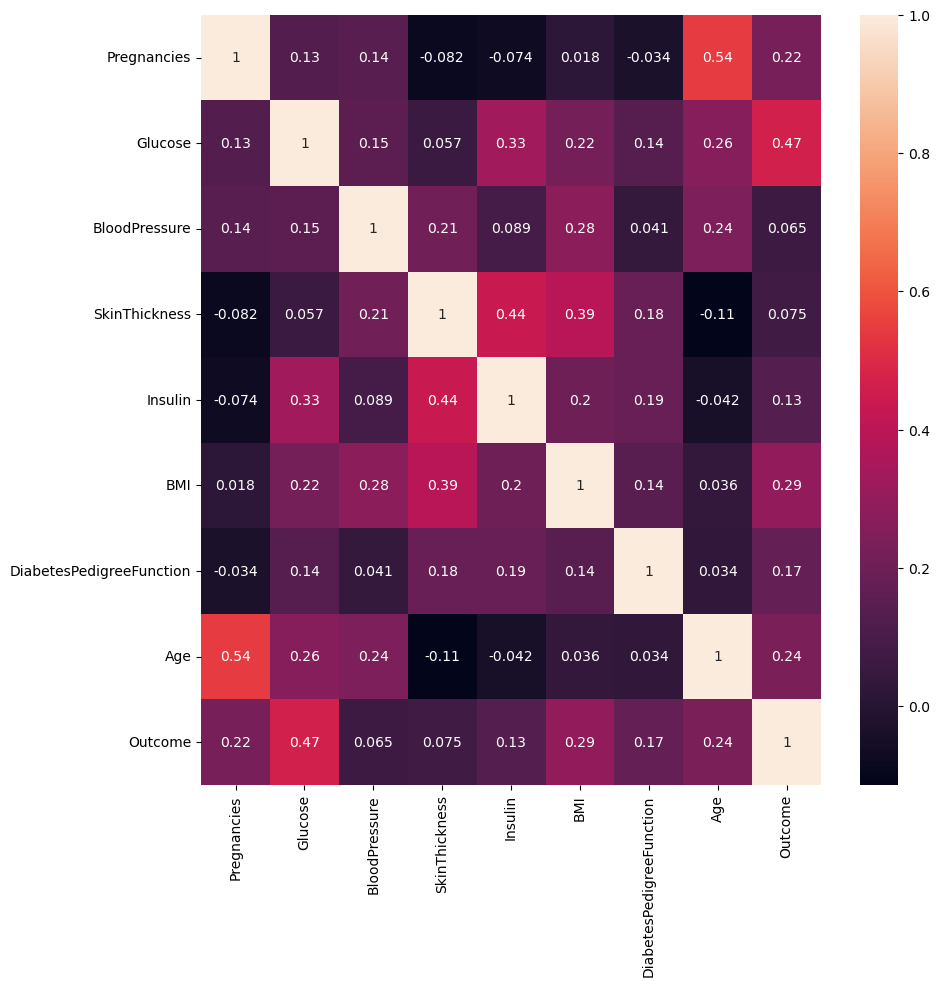

In [7]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
X=df['Glucose']
X

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [20]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
model=LogisticRegression()

In [22]:
model.fit(X.values.reshape(-1,1),y)

LogisticRegression()

In [23]:
y_pred=model.predict(X.values.reshape(-1,1))

In [24]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [25]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy of the model is: ",accuracy)
precision=precision_score(y,y_pred)
print("Precision of the model is: ",precision)
recall=recall_score(y,y_pred)
print("Recall of the model is: ",recall)
f1=f1_score(y,y_pred)
print("F1 score of the model is: ",f1)

Accuracy of the model is:  0.74609375
Precision of the model is:  0.6951871657754011
Recall of the model is:  0.48507462686567165
F1 score of the model is:  0.5714285714285714


<Axes: >

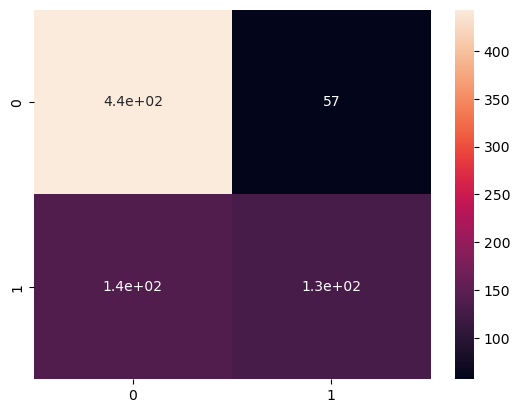

In [26]:
cm=confusion_matrix(y,y_pred)
sns.heatmap(cm,annot=True)

## Multiple Features Implementation

In [63]:
X=df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [64]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
def scale(X):
    scaler=StandardScaler()
    for c in X.columns:
        X[c]=scaler.fit_transform(X[c].values.reshape(-1,1))
    return X

In [67]:
X=scale(X)
X #standardize features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644
...,...,...,...,...,...,...,...,...
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
106,-0.844885,-0.779128,2.734528,-1.288212,-0.692891,-1.217483,-0.799958,-0.531023
270,1.827813,-0.622642,0.873409,1.032726,-0.692891,1.727044,2.005732,0.404942
435,-1.141852,0.629244,-3.572597,-1.288212,-0.692891,1.320902,-0.805998,-0.360847


In [70]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
324,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
624,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
690,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
473,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995
...,...,...,...,...,...,...,...,...
355,1.530847,1.380375,0.976805,-1.288212,-0.692891,-0.202129,-0.513047,1.340908
534,-0.844885,-1.373774,-0.677523,0.593630,-0.206648,0.165937,2.353046,-0.786286
344,1.233880,-0.810425,0.149641,-1.288212,-0.692891,0.610154,0.039635,2.021610
296,-0.547919,0.785730,0.046245,1.095454,2.432952,-0.506735,-0.407342,-0.360847


In [71]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [72]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [73]:
model=LogisticRegression()

In [74]:
model.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [76]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ",accuracy)
precision=precision_score(y_test,y_pred)
print("Precision of the model is: ",precision)
recall=recall_score(y_test,y_pred)
print("Recall of the model is: ",recall)
f1=f1_score(y_test,y_pred)
print("F1 score of the model is: ",f1)

Accuracy of the model is:  0.7532467532467533
Precision of the model is:  0.6491228070175439
Recall of the model is:  0.6727272727272727
F1 score of the model is:  0.6607142857142858


<Axes: >

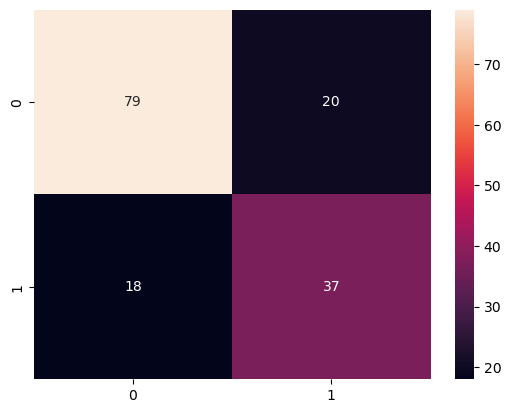

In [77]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)